# TP - Statistique


   Sales_ID     name  year  selling_price  km_driven   Region  \
0         1   Maruti  2014         450000     145500     East   
1         2    Skoda  2014         370000     120000     East   
2         3    Honda  2006         158000     140000  Central   
3         4  Hyundai  2010         225000     127000  Central   
4         5   Maruti  2007         130000     120000     East   

      State or Province           City    fuel seller_type transmission  \
0  District of Columbia     Washington  Diesel  Individual       Manual   
1              New York  New York City  Diesel  Individual       Manual   
2              Illinois        Chicago  Petrol  Individual       Manual   
3              Illinois        Chicago  Diesel  Individual       Manual   
4              New York  New York City  Petrol  Individual       Manual   

          owner  mileage  engine  max_power                    torque  seats  \
0   First_Owner    23.40    1248      74.00            190Nm@ 2000rpm      5  

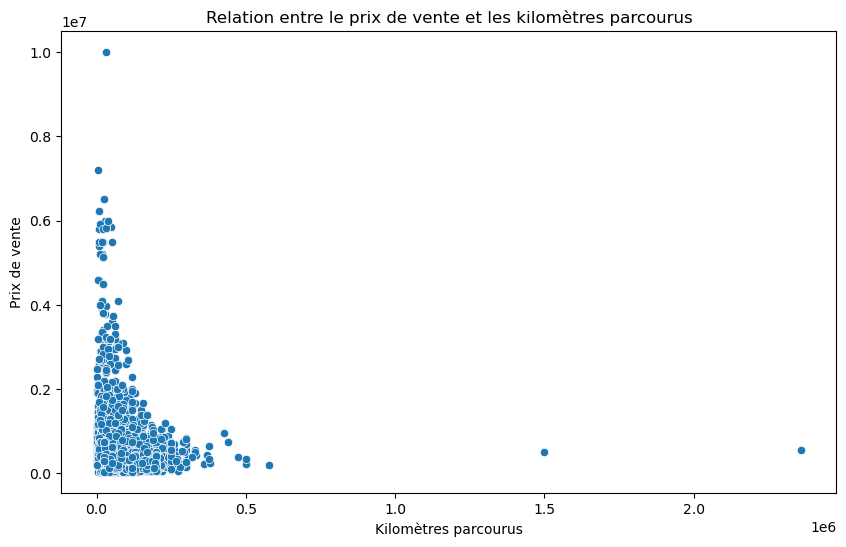

               selling_price  km_driven      year   mileage  max_power
selling_price       1.000000  -0.222158  0.412302 -0.126280   0.749674
km_driven          -0.222158   1.000000 -0.428548 -0.172980  -0.038159
year                0.412302  -0.428548  1.000000  0.328544   0.226598
mileage            -0.126280  -0.172980  0.328544  1.000000  -0.374621
max_power           0.749674  -0.038159  0.226598 -0.374621   1.000000


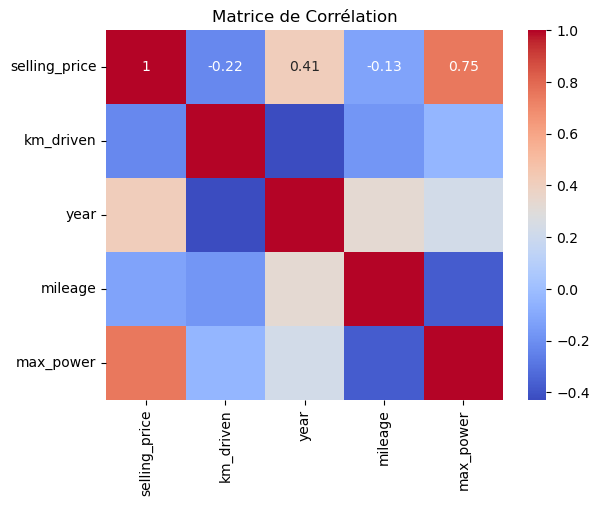

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     4545.
Date:                Sun, 09 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:10:29   Log-Likelihood:            -1.1485e+05
No. Observations:                7906   AIC:                         2.297e+05
Df Residuals:                    7902   BIC:                         2.297e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.915e+07   3.29e+06    -27.111      0.0

In [1]:
"""
27/05/2024
BELLONCLE Robin - BOTHUA Pierre

                                        Projet Base de Données
                                        Mathématiques statistique
                                        
"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Charger le fichier CSV
file_path = 'UserCarData.csv'
Data = pd.read_csv(file_path, sep=',')
Data.columns = [col.strip() for col in Data.columns]  # Supprimer les espaces autour des noms de colonnes

# Afficher les premières lignes pour vérifier le chargement
print(Data.head())

# Sélectionner des colonnes pour l'analyse
columns = ["year", "selling_price", "km_driven", "mileage", "engine", "max_power", "seats"]
year_data, selling_price_data, km_driven_data, mileage_data, engine_data, max_power_data, seats_data = [Data[col] for col in columns]

# Relation entre le prix de vente et les kilomètres parcourus
plt.figure(figsize=(10, 6))
sns.scatterplot(x=km_driven_data, y=selling_price_data)
plt.xlabel('Kilomètres parcourus')
plt.ylabel('Prix de vente')
plt.title('Relation entre le prix de vente et les kilomètres parcourus')
plt.show()

# Matrice de corrélation
correlation_matrix = Data[['selling_price', 'km_driven', 'year', 'mileage', 'max_power']].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()

# Regression linéaire multiple
# Ajout d’une constante pour l’intercept
X = sm.add_constant(Data[['year', 'km_driven', 'max_power']])
# Ajustement du modèle
model = sm.OLS(Data['selling_price'], X).fit()
# Affichage du résumé du modèle
print(model.summary())

# Sélection Pas-à-Pas avec colonnes limitées
def forward_selection_limited(data, response):
    predictors = ['year', 'km_driven', 'max_power']
    remaining = set(predictors)
    selected = []
    current_score, best_new_score = float('inf'), float('inf')
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {}".format(response, ' + '.join(selected + [candidate]))
            score = sm.OLS.from_formula(formula, data).fit().aic
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop(0)
        if current_score > best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {}".format(response, ' + '.join(selected))
    model = sm.OLS.from_formula(formula, data).fit()
    return model

# Application de la sélection pas-à-pas aux données
limited_model = forward_selection_limited(Data, 'selling_price')
print(limited_model.summary())

# Prediction function using the model
def predict_selling_price(model, year, km_driven, max_power):
    # Extract coefficients from the model
    intercept = model.params['Intercept']
    beta_year = model.params['year']
    beta_km_driven = model.params['km_driven']
    beta_max_power = model.params['max_power']

    # Calculate the predicted selling price
    predicted_price = (
        intercept +
        (beta_year * year) +
        (beta_km_driven * km_driven) +
        (beta_max_power * max_power)
    )
    return predicted_price

# Given values for a car: year=2018, km_driven=60000, max_power=165
year = 2018
km_driven = 60000
max_power = 165

# Predict the selling price
predicted_price = predict_selling_price(limited_model, year, km_driven, max_power)
print(f"Predicted selling price for a car from {year} with {max_power} hp and {km_driven} km driven: {predicted_price:.2f}")
